In [1]:
import os

# root folder
afstudeerProjectRoot = ""

# paths
modelKerasPath = os.path.join(afstudeerProjectRoot, "mobilenet_models/")
modelTFLitePath = os.path.join(afstudeerProjectRoot, "mobilenet_models_tflite/")
collectedButterflyImagesPath = os.path.join(afstudeerProjectRoot, "collected_butterfly_images/")
trainingAndValidationDatasetFolder = "training_and_validation_data/"
trainingAndValidationDatasetPath = os.path.join(afstudeerProjectRoot, trainingAndValidationDatasetFolder)
testButterflyImages = os.path.join(afstudeerProjectRoot, "test_images/")
confusionMatricesImagesPath = os.path.join(afstudeerProjectRoot, "confusion_matrices/")

# List of all paths to create
paths_to_create = [
    modelKerasPath,
    modelTFLitePath,
    collectedButterflyImagesPath,
    trainingAndValidationDatasetPath,
    testButterflyImages,
    confusionMatricesImagesPath
]

# Create all target folders if they don't exist
for path in paths_to_create:
    if not os.path.exists(path):
        os.makedirs(path, exist_ok=True)
        print(f"Created directory: {path}")
    else:
        print(f"Directory already exists: {path}")


Directory already exists: mobilenet_models/
Directory already exists: mobilenet_models_tflite/
Directory already exists: collected_butterfly_images/
Directory already exists: training_and_validation_data/
Directory already exists: test_images/
Directory already exists: confusion_matrices/


In [2]:
# DIT ZIJN HELPER FUNCTIES, WELKE ZIJN GEMAAKT VOOR HET WERKEN MET FOLDERS
# DEZE MOETEN ERVOOR ZORGEN ENKELE FOLDER OPERATIES GOED VERLOPEN

def get_all_folders_in_directory(directory_path: str) -> list:
    # Initialize an empty list to hold the folder paths
    folder_paths = []
    # List all items in the current directory
    for item in os.listdir(directory_path):
        full_path = os.path.join(directory_path, item)

        # Check if the item is a directory (exclude files)
        if os.path.isdir(full_path):
            # print('Folder selected: ' + item)
            folder_paths.append(full_path)

    return folder_paths

def get_categories_butterfly(directory_path: str) -> list:
    butterfly_categories = []
    folders = get_all_folders_in_directory(directory_path)
    for folder in folders:
        butterfly_categories.append(os.path.basename(os.path.normpath(folder)))
    return butterfly_categories

def remove_unwanted_dir(path, unwanted_dirs):
    for unwanted_dir in unwanted_dirs:
        dir_path = os.path.join(path, unwanted_dir)
        if os.path.exists(dir_path) and os.path.isdir(dir_path):
            shutil.rmtree(dir_path)
            print(f"Removed directory: {dir_path}")

In [3]:
# IN DEZE CODE WORDEN DE LABELS VERZAMELT
import os

categories = []

categories = get_categories_butterfly(collectedButterflyImagesPath)
# print(categories)
# CATEGORIES WORDEN HIER GESORTEERD. DE POSITIES WAAROP DE VLINDERSOORTEN HIER ZIJN, ZAL GEBRUIKT WORDEN VOOR HERKENNING OOK IN HET MODEL
categories.sort()
print(categories)

['Aphrissa statira', 'Arawacus aetolus', 'Ascia monuste', 'Brassolis sophorae', 'Caligo illioneus', 'Caligo teucer', 'Chloreuptychia chlorimene', 'Colobura dirce', 'Danaus eresimus', 'Eryphanis automedon', 'Eurema albula', 'Glutophrissa drusilla', 'Haetera piera', 'Heliconius antiochus', 'Helicopis cupido', 'Heliopetes arsalte', 'Heraclides thoas', 'Itaballia demophile', 'Leptotes cassius', 'Mechanitis polymnia', 'Morpho deidamia', 'Morpho menelaus', 'Nymphidium caricae', 'Opsiphanes quiteria', 'Phoebis argante', 'Phoebis philea', 'Phoebis sennae', 'Pierella hyalinus', 'Pseudolycaena marsyas', 'Pyrisitia venusta', 'Rhabdodryas trite', 'Sais rosalia', 'Stalachtis calliope', 'Stalachtis phlegia', 'Temenis laothoe']


In [100]:
import random

# SPLIT THE DATA IN TRAIN AND VALIDATION (not testing)

# HOEVEELHEID VAN DE AFBEELDINGEN NAAR DE TRAININGSDATASET ZULLEN GAAN
splitsize = 0.80

def split_data(SOURCES, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for SOURCE in SOURCES:
        for file_name in os.listdir(SOURCE):
            file_dir = SOURCE + file_name
            # print(file)

            if os.path.getsize(file_dir) > 0:
                # print("file dir: " + file_dir)
                files.append(file_dir)
            else:
                print(file_dir + " is 0 length , ignore it")

    trainings_length = int(len(files) * SPLIT_SIZE)  # 0.80 van de files wordt als training data gebruikt
    shuffle_set = random.sample(files, len(files))
    training_set = shuffle_set[0:trainings_length]
    valid_set = shuffle_set[trainings_length:]

    # copy the train images

    for file_dir in training_set:
        filename = os.path.basename(file_dir)
        destination = TRAINING + filename
        shutil.copyfile(file_dir, destination)

    # copy the validation images

    for file_dir in valid_set:
        filename = os.path.basename(file_dir)
        destination = VALIDATION + filename
        shutil.copyfile(file_dir, destination)


# buiten function

trainPath = trainingAndValidationDatasetPath + "/train"
validatePath = trainingAndValidationDatasetPath + "/validate"

# create the target folder
existDataSetPth = os.path.exists(trainPath)
if not existDataSetPth:
    os.mkdir(trainPath)

existDataSetPth = os.path.exists(validatePath)
if not existDataSetPth:
    os.mkdir(validatePath)

# lets run the function for each of the folders

for category in categories:
    trainDestPath = trainPath + "/" + category
    validateDestPath = validatePath + "/" + category

    if not os.path.exists(trainDestPath):
        os.mkdir(trainDestPath)
    if not os.path.exists(validateDestPath):
        os.mkdir(validateDestPath)

    sourcepaths = []

    originalDatasetCategoryPath = collectedButterflyImagesPath + "/" + category + "/"

    sourcepaths.append(originalDatasetCategoryPath)

    trainDestPath = trainDestPath + "/"
    validateDestPath = validateDestPath + "/"

    split_data(sourcepaths, trainDestPath, validateDestPath, splitsize)

    # Utility function to remove unwanted directories

remove_unwanted_dir(trainPath, ['.ipynb_checkpoints'])
remove_unwanted_dir(validatePath, ['.ipynb_checkpoints'])

In [4]:
# FIND FOLDER WITH THE MOST AMOUNT OF IMAGES
# DEZE CODE ZAL GEBRUIKT WORDEN OM AUTOMATISCH NA TE GAAN WELKE
# VLINDERSOORT DE MEESTE AFBEELDINGEN HEBBEN

trainPath = trainingAndValidationDatasetPath + "/train"
validatePath = trainingAndValidationDatasetPath + "/validate"


def find_subfolder_with_most_images(folder_path):
    image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.svg'}
    max_images = 0
    subfolder_with_max_images = None

    # Walk through the folder and its subfolders
    for root, dirs, files in os.walk(folder_path):
        # Count image files only in the current directory
        num_images = sum(1 for f in files if os.path.splitext(f)[1].lower() in image_extensions)
        if num_images > max_images:
            max_images = num_images
            subfolder_with_max_images = root

    if subfolder_with_max_images:
        print(f"Subfolder with the most images:")
        print(f"Path: {subfolder_with_max_images}")
        print(f"Number of images: {max_images}")
    else:
        print("No subfolders with images were found.")


find_subfolder_with_most_images(trainPath)


Subfolder with the most images:
Path: training_and_validation_data//train\Aphrissa statira
Number of images: 300


In [7]:
# DEZE CODE WORDT GEBRUIKT OM NA TE GAAN HOEVEEL AFBEELDINGEN
# ELKE VLINDERSOORT BEVAT ALS TRAININGSDATA


def print_subfolder_item_counts(folder_path):
    # Check if the provided path exists
    if not os.path.exists(folder_path):
        print(f"Error: The path '{folder_path}' does not exist.")
        return

    # Check if the provided path is a directory
    if not os.path.isdir(folder_path):
        print(f"Error: '{folder_path}' is not a directory.")
        return

    print(f"Analyzing contents of: {folder_path}\n")

    # Walk through the folder and its subfolders
    for root, dirs, files in os.walk(folder_path):
        # Count all items (files and directories) in the current directory
        num_items = len(dirs) + len(files)
        # Print the subfolder name and the number of items it contains
        print(f"Subfolder: {root}")
        print(f"Number of items: {num_items}\n")


print_subfolder_item_counts(trainPath)

Analyzing contents of: training_and_validation_data//train

Subfolder: training_and_validation_data//train
Number of items: 35

Subfolder: training_and_validation_data//train\Aphrissa statira
Number of items: 300

Subfolder: training_and_validation_data//train\Arawacus aetolus
Number of items: 300

Subfolder: training_and_validation_data//train\Ascia monuste
Number of items: 300

Subfolder: training_and_validation_data//train\Brassolis sophorae
Number of items: 300

Subfolder: training_and_validation_data//train\Caligo illioneus
Number of items: 300

Subfolder: training_and_validation_data//train\Caligo teucer
Number of items: 300

Subfolder: training_and_validation_data//train\Chloreuptychia chlorimene
Number of items: 300

Subfolder: training_and_validation_data//train\Colobura dirce
Number of items: 300

Subfolder: training_and_validation_data//train\Danaus eresimus
Number of items: 300

Subfolder: training_and_validation_data//train\Eryphanis automedon
Number of items: 300

Subfold

In [103]:
# SHOW AMOUNT OF IMAGES FOR VALIDATION DATASET

print_subfolder_item_counts(validatePath)

Analyzing contents of: training_and_validation_data/validate

Subfolder: training_and_validation_data/validate
Number of items: 35

Subfolder: training_and_validation_data/validate\Aphrissa statira
Number of items: 52

Subfolder: training_and_validation_data/validate\Arawacus aetolus
Number of items: 57

Subfolder: training_and_validation_data/validate\Ascia monuste
Number of items: 39

Subfolder: training_and_validation_data/validate\Brassolis sophorae
Number of items: 34

Subfolder: training_and_validation_data/validate\Caligo illioneus
Number of items: 63

Subfolder: training_and_validation_data/validate\Caligo teucer
Number of items: 25

Subfolder: training_and_validation_data/validate\Chloreuptychia chlorimene
Number of items: 40

Subfolder: training_and_validation_data/validate\Colobura dirce
Number of items: 48

Subfolder: training_and_validation_data/validate\Danaus eresimus
Number of items: 37

Subfolder: training_and_validation_data/validate\Eryphanis automedon
Number of item

In [5]:
# HULP FUNCTIE WELKE ERVOOR MOET ZORGEN DAT STEEDS DE LAATSTE MODEL WORDT GENOMEN UIT DE FOLDER WELKE MODELLEN OPSLAAT
# DIT IS GEMAAKT VOOR HET SOEPEL LATEN VERLOPEN VAN DIT ONDERZOEK
import glob
from tensorflow.keras.preprocessing import image


def get_last_modified_model(folder_path: str) -> str:
    # Get all .keras and .tflite files in the folder
    keras_files = glob.glob(os.path.join(folder_path, '*.keras'))
    tflite_files = glob.glob(os.path.join(folder_path, '*.tflite'))

    # Combine both file lists
    files = keras_files + tflite_files

    if not files:
        return None  # No files in the folder

    # Sort files by modification time (latest first)
    latest_file = max(files, key=os.path.getmtime)

    return latest_file

In [6]:
# CODE VOOR HET TRAINEN VAN HET MODEL VOLGENS DE FEATURE EXTRACTION TRANSFER LEARNING METHODE
# ALSOOK HET OPSLAAN VAN DE KERAS FORMAAT VAN HET MODEL EN HET CONVERTEREN EN OPSLAAN VAN DE TFLITE FORMAAT 
# VAN HET MODEL
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.optimizers import Adam
import datetime
import time
from tensorflow.keras import models, layers

# Variable om achter te halen hoeveel vlindersoorten/klassen er zijn
numberOfClasses = len(categories)

validateImagesPath = afstudeerProjectRoot + trainingAndValidationDatasetFolder + "validate/"
trainImagesPath = afstudeerProjectRoot + trainingAndValidationDatasetFolder + "train/"

# Trainings dataset wordt voorbereid voor training en afbeelingen worden resized
train_ds = tf.keras.utils.image_dataset_from_directory(
    trainImagesPath,
    image_size=(224, 224),
    seed=123
)

# Validatie dataset wordt voorbereid voor training en afbeelingen worden resized
val_ds = tf.keras.utils.image_dataset_from_directory(
    validateImagesPath,
    image_size=(224, 224),
    seed=123
)

# Een MobileNetV3-Large model, voorgetraind op ImageNet-1k
# include_top=False load het voorgetraind model zonder de top/classificatie laag
base_model_mobilenetv3large = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers of the base model. Dit wordt gedaan om ervoor te zorgen dat het model niet wordt getraind
# maar alleen de classificatie lagen welke later gezet zullen worden
for layer in base_model_mobilenetv3large.layers:
    layer.trainable = False

# Toevoegen van classification layers
model_mobilenetv3large = models.Sequential([
    base_model_mobilenetv3large,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(numberOfClasses, activation='softmax')
])

print(model_mobilenetv3large.summary())

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Toepassing earlystopping, model zal stoppen met trainen na 10 epochs van geen improvement.
# De standaard metriek wat wordt gemonitord is het validatie verlies
# restore_best_weights=True zorgt ervoor dat bij het stoppen van het 
# trainingsprocess, de gewichten genomen zullen worden waar het model het
# laagste validatie verlies heeft
earlyStoppingCallback = EarlyStopping(
    patience=10, restore_best_weights=True
)

# Learning rate wordt hier ingesteld
optimizer = Adam(learning_rate=0.0001)
model_mobilenetv3large.compile(loss="sparse_categorical_crossentropy",
                               optimizer=optimizer, metrics=['accuracy'])

# Hier wordt de tijd vastgesteld dat het model begint met trainen
# Dit zal worden weergegeven in de output, maar ook worden gebruikt
# om de tijdsduur van het trainingsproces te berekenen
start_time = time.time()
start_datetime = datetime.datetime.now()
print(f"Script started at: {start_datetime.strftime('%Y-%m-%d %H:%M:%S')}")

# Training vind plaats voor 100 epochs, kan eerder stoppen als er overfitting is, doordat er EarlyStopping is toegepast
history = model_mobilenetv3large.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[earlyStoppingCallback])

end_time = time.time()
end_datetime = datetime.datetime.now()
print(f"Script ended at:   {end_datetime.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Total elapsed time: {end_time - start_time:.2f} seconds")


epochs_trained = len(history.history['loss'])

epoch_range = range(1, epochs_trained + 1)

currentTime = datetime.datetime.now()

modelDateTrained = currentTime.strftime("%Y-%m-%d_%H_%M")

# De folder waarin de grafieken van de verliezen en accuraatheid zullen worden opgeslagen
folder_path = os.path.join(modelKerasPath, f'{modelDateTrained}_extractor_method')
os.makedirs(folder_path, exist_ok=True)
print(f"Opslagmap aangemaakt: {folder_path}")

# --- Code om de trainings - en validatie verliezen grafisch weer te geven ---
plt.figure()
plt.plot(epoch_range, history.history['loss'], label='Training Loss')
plt.plot(epoch_range, history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')  # Aangepaste locatie voor betere zichtbaarheid
loss_plot_path = os.path.join(folder_path, 'model_loss_plot.png')
plt.savefig(loss_plot_path) # opslaan van een afbeelding van de grafiek
plt.show()  # toon de plot
plt.close()  # Sluit de figuur om geheugen vrij te maken
print(f"Loss plot opgeslagen in: {loss_plot_path}")
# -----------------------------------------------------------------------------


# --- Code om de trainings - en validatie accuraatheid grafisch weer te geven ---
plt.figure()
plt.plot(epoch_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epoch_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')  # Aangepaste titel
plt.ylabel('Accuracy')  # Aangepast label
plt.xlabel('Epoch')
plt.legend(loc='lower right')  # Aangepaste locatie voor betere zichtbaarheid\
accuracy_plot_path = os.path.join(folder_path, 'model_accuracy_plot.png')
plt.savefig(accuracy_plot_path) # opslaan van een afbeelding van de grafiek
plt.show()
plt.close()  # Sluit de figuur om geheugen vrij te maken
print(f"Accuracy plot opgeslagen in: {accuracy_plot_path}")
# -----------------------------------------------------------------------------


# --- HIER WORDT HET MODEL OPGESLAGEN, ZODAT HET IN VERDERE CODE GEBRUIKT KAN WORDEN ---
modelSavedPath = modelKerasPath + f'/__{modelDateTrained}_extractor_method.keras'

try:
    os.remove(modelSavedPath)
    print(f"File '{modelSavedPath}' has been removed.")
except FileNotFoundError:
    print(f"File '{modelSavedPath}' does not exist.")
except PermissionError:
    print(f"Permission denied: Unable to delete '{modelSavedPath}'.")
except OSError as e:
    print(f"Error: {e.strerror} - {e.filename}")

#save the keras model
model_mobilenetv3large.save(modelSavedPath)

model = tf.keras.models.load_model(modelSavedPath)
# -----------------------------------------------------------------------------


# --- MODEL CONVERTEREN NAAR TFLITE FORMAAT ---
try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    model_mobilenetv3large_tflite = converter.convert()
    print("Model converted successfully.")
except Exception as e:
    print(f"Error during conversion: {e}")

currentTime = datetime.datetime.now()
modelDateTrained = currentTime.strftime("%Y-%m-%d_%H_%M")

model_mobilenetv3large_tflite_path = modelTFLitePath + f'/__{modelDateTrained}.tflite'

try:
    os.remove(model_mobilenetv3large_tflite_path)
    print(f"File '{model_mobilenetv3large_tflite_path}' has been removed.")
except FileNotFoundError:
    print(f"File '{model_mobilenetv3large_tflite_path}' does not exist.")
except PermissionError:
    print(f"Permission denied: Unable to delete '{model_mobilenetv3large_tflite_path}'.")
except OSError as e:
    print(f"Error: {e.strerror} - {e.filename}")

# --- OPSLAAN VAN HET TFLITE MODEL ---
with open(model_mobilenetv3large_tflite_path, 'wb') as f:
    f.write(model_mobilenetv3large_tflite)

Found 10500 files belonging to 35 classes.
Found 1536 files belonging to 35 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Function  (None, 7, 7, 960)         2996352   
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 960)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               246016    
                                                                 
 dense_1 (Dense)             (None, 35)                8995      
                                                                 
Total params: 3251363 (12.40 MB)
Trainable params: 255011 (996.14 KB)
Non-trainable params: 2996352 (11

KeyboardInterrupt: 

Found 10500 files belonging to 35 classes.
Found 1536 files belonging to 35 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 7, 7, 576)         939120    
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 576)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               147712    
                                                                 
 dense_1 (Dense)             (None, 35)                8995      
                                                                 
Total params: 1095827 (4.18 MB)
Trainable params: 156707 (612.14 KB)
Non-trainable params: 939120 (3.58

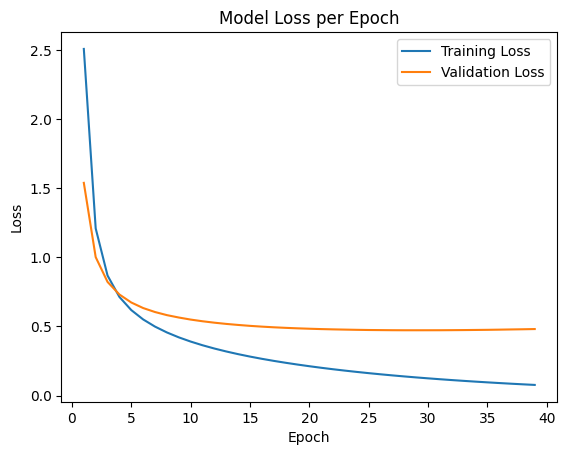

Loss plot opgeslagen in: mobilenet_models/2025-05-05_01_25_extractor_method\model_loss_plot.png


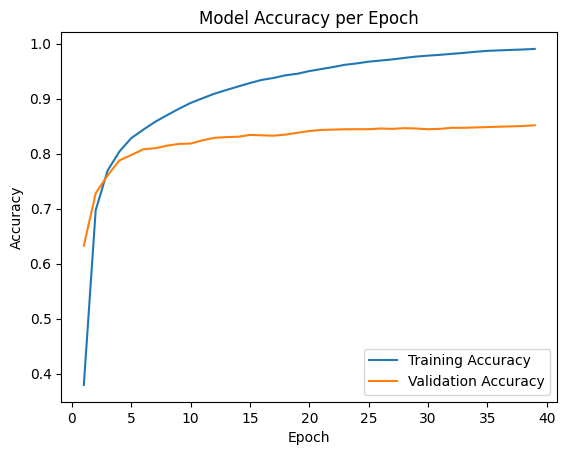

Accuracy plot opgeslagen in: mobilenet_models/2025-05-05_01_25_extractor_method\model_accuracy_plot.png
File 'mobilenet_models/__2025-05-05_01_25_extractor_method.keras' does not exist.
INFO:tensorflow:Assets written to: C:\Users\JKHARP~1\AppData\Local\Temp\tmppuvcsqp1\assets


INFO:tensorflow:Assets written to: C:\Users\JKHARP~1\AppData\Local\Temp\tmppuvcsqp1\assets


Model converted successfully.
File 'mobilenet_models_tflite/__2025-05-05_01_25.tflite' does not exist.


In [9]:
# Feature Extraction method (MobileNetV3 Small)
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.optimizers import Adam
import datetime
import time
from tensorflow.keras import models, layers

# Variable om achter te halen hoeveel vlindersoorten er zijn
# Deze hoeveelheid wordt later gebruikt
numberOfClasses = len(categories)

validateImagesPath = afstudeerProjectRoot + trainingAndValidationDatasetFolder + "/validate/"
trainImagesPath = afstudeerProjectRoot + trainingAndValidationDatasetFolder + "/train/"

train_ds = tf.keras.utils.image_dataset_from_directory(
    trainImagesPath,
    image_size=(224, 224),
    seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    validateImagesPath,
    image_size=(224, 224),
    seed=123
)

base_model_mobilenetv3large = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers of the base model
for layer in base_model_mobilenetv3large.layers:
    layer.trainable = False

# Add classification layers volgens ene paper gedaan (Feature Extraction)
model_mobilenetv3large = models.Sequential([
    base_model_mobilenetv3large,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(numberOfClasses, activation='softmax')
])

print(model_mobilenetv3large.summary())

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#Toepassing earlystopping, model zal stoppen met trainen na 10 epochs van geen improvement
earlyStoppingCallback = EarlyStopping(
    patience=10, restore_best_weights=True
)

optimizer = Adam(learning_rate=0.0001)
model_mobilenetv3large.compile(loss="sparse_categorical_crossentropy",
                               optimizer=optimizer, metrics=['accuracy'])  # metrics accuracy kan ik later voor mezelf

#train
#Veranderen, gewoon de images in folders zetten en dat gebruiken liever
start_time = time.time()
start_datetime = datetime.datetime.now()
print(f"Script started at: {start_datetime.strftime('%Y-%m-%d %H:%M:%S')}")
history = model_mobilenetv3large.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[earlyStoppingCallback])
end_time = time.time()
end_datetime = datetime.datetime.now()
print(f"Script ended at:   {end_datetime.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Total elapsed time: {end_time - start_time:.2f} seconds")

print(history.history)

# CODE OM GRAFIEKEN TE MAKEN VOOR DE VERLIEZEN EN ACCURAATHEID


epochs_trained = len(history.history['loss'])
epoch_range = range(1, epochs_trained + 1)

currentTime = datetime.datetime.now()

modelDateTrained = currentTime.strftime("%Y-%m-%d_%H_%M")

folder_path = os.path.join(modelKerasPath, f'{modelDateTrained}_extractor_method')

# Maak de map aan als deze nog niet bestaat
# exist_ok=True voorkomt een fout als de map al bestaat
os.makedirs(folder_path, exist_ok=True)
print(f"Opslagmap aangemaakt: {folder_path}")

# --- Plot en sla de loss-waarden op ---
plt.figure()  # Maak een nieuwe figuur aan voor de loss plot
plt.plot(epoch_range, history.history['loss'], label='Training Loss')
plt.plot(epoch_range, history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')  # Aangepaste locatie voor betere zichtbaarheid
# Definieer het volledige pad inclusief bestandsnaam voor de loss plot [1][3]
loss_plot_path = os.path.join(folder_path, 'model_loss_plot.png')

plt.savefig(loss_plot_path)
plt.show()  # toon de plot
plt.close()  # Sluit de figuur om geheugen vrij te maken
print(f"Loss plot opgeslagen in: {loss_plot_path}")

# --- Plot en sla de accuracy-waarden op ---
plt.figure()  # Maak een nieuwe figuur aan voor de accuracy plot
plt.plot(epoch_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epoch_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')  # Aangepaste titel
plt.ylabel('Accuracy')  # Aangepast label
plt.xlabel('Epoch')
plt.legend(loc='lower right')  # Aangepaste locatie voor betere zichtbaarheid
# Definieer het volledige pad inclusief bestandsnaam voor de accuracy plot
accuracy_plot_path = os.path.join(folder_path, 'model_accuracy_plot.png')
# Sla de figuur op
plt.savefig(accuracy_plot_path)
plt.show()
plt.close()  # Sluit de figuur om geheugen vrij te maken
print(f"Accuracy plot opgeslagen in: {accuracy_plot_path}")

# HIER WORDT HET MODEL OPGESLAGEN, ZODAT HET IN VERDERE CODE GEBRUIKT KAN WORDEN
modelSavedPath = modelKerasPath + f'__{modelDateTrained}_extractor_method.keras'

try:
    os.remove(modelSavedPath)
    print(f"File '{modelSavedPath}' has been removed.")
except FileNotFoundError:
    print(f"File '{modelSavedPath}' does not exist.")
except PermissionError:
    print(f"Permission denied: Unable to delete '{modelSavedPath}'.")
except OSError as e:
    print(f"Error: {e.strerror} - {e.filename}")

#save the keras model
model_mobilenetv3large.save(modelSavedPath)

model = tf.keras.models.load_model(modelSavedPath)

# Converting to TF lite
try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    # converter.optimizations = [tf.lite.Optimize.DEFAULT]
    model_mobilenetv3large_tflite = converter.convert()
    print("Model converted successfully.")
except Exception as e:
    print(f"Error during conversion: {e}")

currentTime = datetime.datetime.now()

modelDateTrained = currentTime.strftime("%Y-%m-%d_%H_%M")

model_mobilenetv3large_tflite_path = modelTFLitePath + f'__{modelDateTrained}.tflite'

try:
    os.remove(model_mobilenetv3large_tflite_path)
    print(f"File '{model_mobilenetv3large_tflite_path}' has been removed.")
except FileNotFoundError:
    print(f"File '{model_mobilenetv3large_tflite_path}' does not exist.")
except PermissionError:
    print(f"Permission denied: Unable to delete '{model_mobilenetv3large_tflite_path}'.")
except OSError as e:
    print(f"Error: {e.strerror} - {e.filename}")

# Save the tf-lite model.
with open(model_mobilenetv3large_tflite_path, 'wb') as f:
    f.write(model_mobilenetv3large_tflite)

Found 2616 files belonging to 35 classes.
82/82 [==============================] - 53s 633ms/step


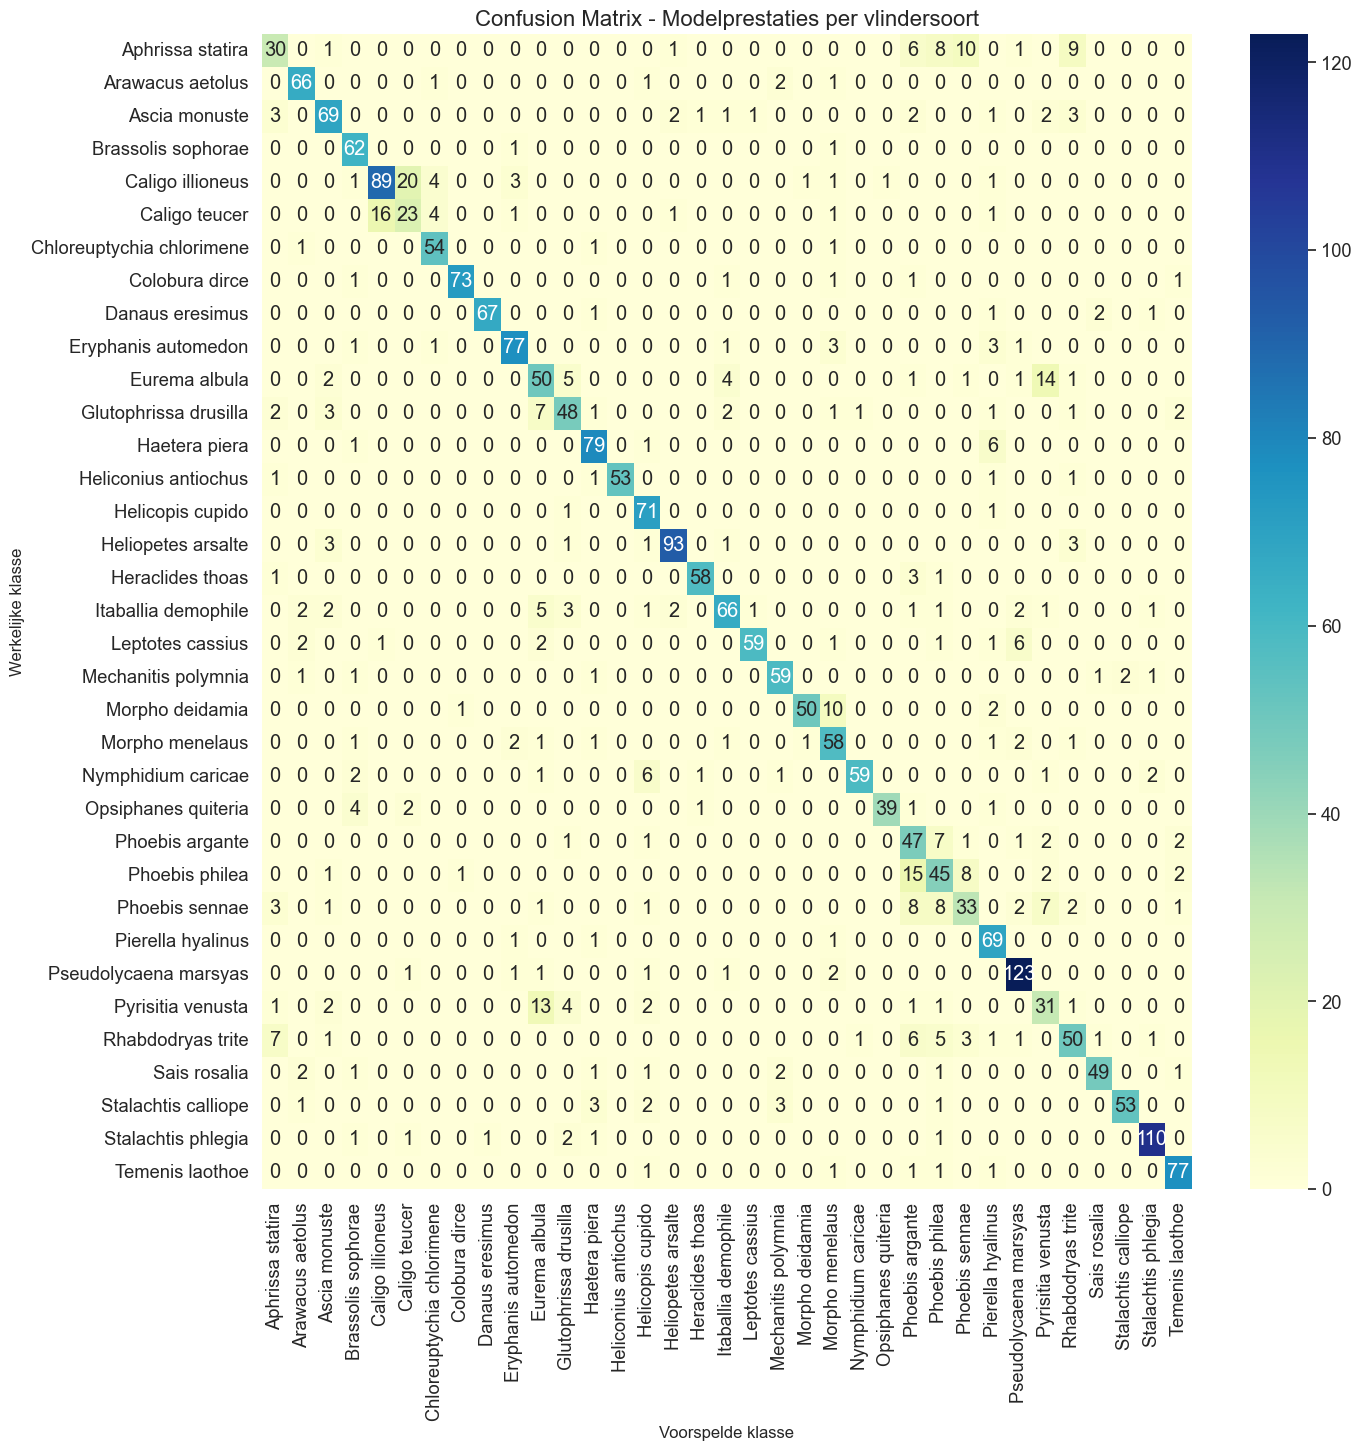

Accuracy: 0.8177
Balanced Accuracy: 0.8085

Classification Report:
                           precision    recall  f1-score   support

         Aphrissa statira       0.62      0.45      0.53        66
         Arawacus aetolus       0.88      0.93      0.90        71
            Ascia monuste       0.81      0.81      0.81        85
       Brassolis sophorae       0.82      0.97      0.89        64
         Caligo illioneus       0.84      0.74      0.78       121
            Caligo teucer       0.49      0.49      0.49        47
Chloreuptychia chlorimene       0.84      0.95      0.89        57
           Colobura dirce       0.97      0.94      0.95        78
          Danaus eresimus       0.99      0.93      0.96        72
      Eryphanis automedon       0.90      0.89      0.89        87
            Eurema albula       0.62      0.63      0.63        79
    Glutophrissa drusilla       0.74      0.70      0.72        69
            Haetera piera       0.87      0.91      0.89     

In [7]:
# Confusion Matrix en Berekening van evaluatie meetrieken voor het Keras-model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, \
    balanced_accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# Genereer testdataset met vaste volgorde (shuffle=False) voor consistente labelkoppeling
test_ds_for_predictions = tf.keras.utils.image_dataset_from_directory(
    testButterflyImages,
    image_size=(224, 224),  # Inputformaat moet overeenkomen met modeltraining
    shuffle=False,  # Behoud oorspronkelijke volgorde voor correcte labeltoewijzing
    batch_size=32
)

# Laad het laatst getrainde model voor reproduceerbare resultaten
# model_path = get_last_modified_model(modelKerasPath)
model_path = modelKerasPath + '__2025-04-29_13_34_extractor_method.keras'
model_mobilenetv3large = tf.keras.models.load_model(model_path)

# Genereer voorspellingen (klasse-waarschijnlijkheden) voor de testdataset
y_pred_probabilities = model_mobilenetv3large.predict(test_ds_for_predictions)

# Converteer waarschijnlijkheden naar klasse-indices (0-34) via argmax
y_pred = np.argmax(y_pred_probabilities, axis=1)  # Selecteer index met hoogste waarschijnlijkheid

# Verzamel werkelijke labels uit de testdataset
true_labels = np.concatenate([y for _, y in test_ds_for_predictions], axis=0)

# Bereken confusion matrix: vergelijk werkelijke vs. voorspelde labels
cm = confusion_matrix(true_labels, y_pred)

# Visualiseer confusion matrix met Seaborn voor betere leesbaarheid
plt.figure(figsize=(15, 15))  # Groot formaat voor 35 klassen
sns.set(font_scale=1.2)  # Vergroot tekst voor leesbaarheid

# Gebruik klasse-namen i.p.v. indices voor interpretatie
class_names = list(categories)
sns.heatmap(
    cm, 
    annot=True,  # Toon aantallen in cellen
    fmt='d',     # Gehele getallen weergeven
    cmap='YlGnBu',  # Kleurenschema voor visuele duidelijkheid
    xticklabels=class_names, 
    yticklabels=class_names
)

plt.xlabel('Voorspelde klasse', fontsize=12)
plt.ylabel('Werkelijke klasse', fontsize=12)
plt.title('Confusion Matrix - Modelprestaties per vlindersoort', fontsize=16)
plt.show()

plt.close()

# Accuracy
acc = accuracy_score(true_labels, y_pred)
print(f"Accuracy: {acc:.4f}")

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(true_labels, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

# Detailed Classification Report
print("\nClassification Report:")
report = classification_report(true_labels, y_pred, target_names=class_names)
print(report)

# Average metrics
print("\nAverage Metrics:")
print(f"Macro Precision: {precision_score(true_labels, y_pred, average='macro'):.4f}")
print(f"Macro Recall: {recall_score(true_labels, y_pred, average='macro'):.4f}")
print(f"Macro F1: {f1_score(true_labels, y_pred, average='macro'):.4f}")


mobilenet_models_tflite\__2025-05-05_01_25.tflite
{'serving_default': {'inputs': ['MobilenetV3small_input'], 'outputs': ['dense_1']}}
Input details: [{'name': 'serving_default_MobilenetV3small_input:0', 'index': 0, 'shape': array([  1, 224, 224,   3]), 'shape_signature': array([ -1, 224, 224,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall:0', 'index': 227, 'shape': array([ 1, 35]), 'shape_signature': array([-1, 35]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Expected input shape: [  1 224 224   3]
Found 2616 files belonging to 35 classes.
True labels (true_labels): [ 0  0  0 ... 34 34 34]

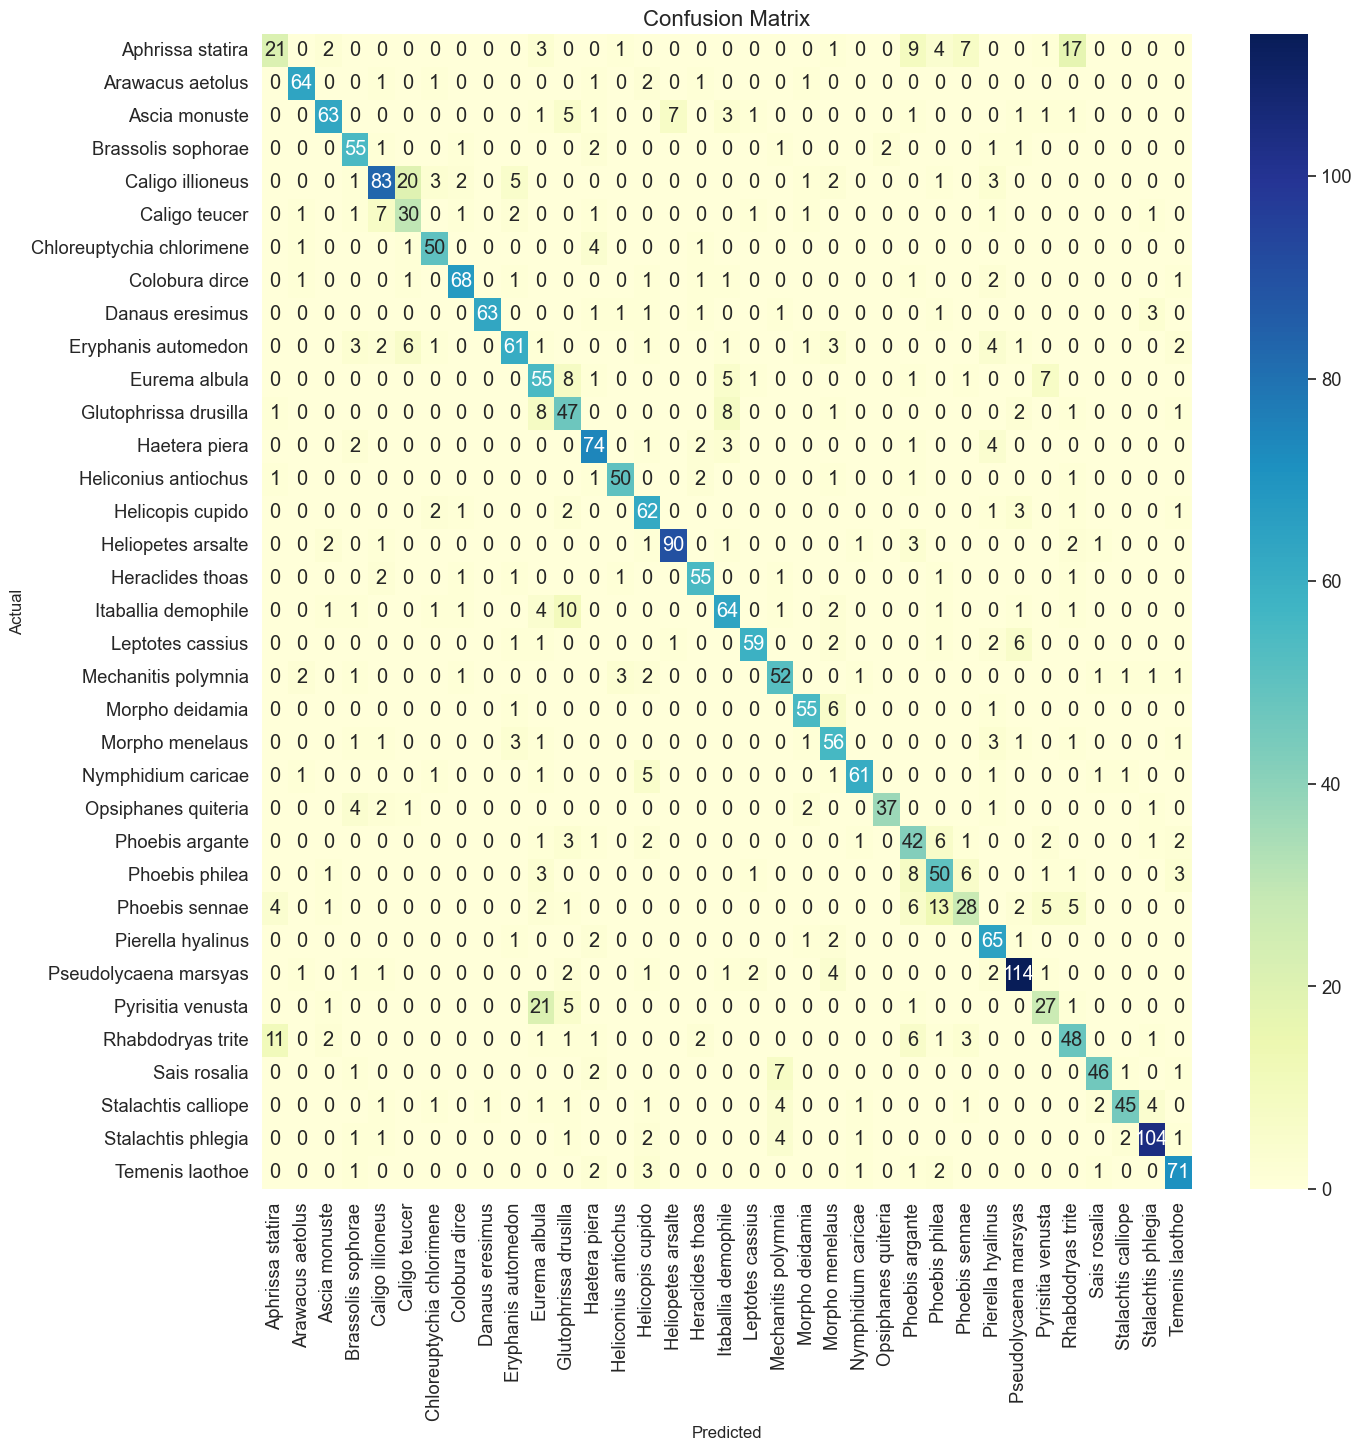

Accuracy: 0.7703
Balanced Accuracy: 0.7632

Classification Report:
                           precision    recall  f1-score   support

         Aphrissa statira       0.55      0.32      0.40        66
         Arawacus aetolus       0.90      0.90      0.90        71
            Ascia monuste       0.86      0.74      0.80        85
       Brassolis sophorae       0.75      0.86      0.80        64
         Caligo illioneus       0.81      0.69      0.74       121
            Caligo teucer       0.51      0.64      0.57        47
Chloreuptychia chlorimene       0.83      0.88      0.85        57
           Colobura dirce       0.89      0.87      0.88        78
          Danaus eresimus       0.98      0.88      0.93        72
      Eryphanis automedon       0.80      0.70      0.75        87
            Eurema albula       0.53      0.70      0.60        79
    Glutophrissa drusilla       0.55      0.68      0.61        69
            Haetera piera       0.79      0.85      0.82     

In [11]:
# Confusion Matrix voor Tensorflow Lite model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import datetime

# Obtain the latest saved model path
modelSavedPath = get_last_modified_model(modelTFLitePath)
# modelSavedPath = modelTFLitePath + "__2025-04-21_21_21.tflite"
print(modelSavedPath)

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=modelSavedPath)

print(interpreter.get_signature_list())

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input details:", input_details)
print("Output details:", output_details)

# Extract model parameters
input_shape = input_details[0]['shape']
print(f"Expected input shape: {input_shape}")

# Create validation dataset with proper preprocessing
val_ds_for_predictions = tf.keras.utils.image_dataset_from_directory(
    testButterflyImages,
    image_size=(input_shape[1], input_shape[2]),  # Match model's expected dimensions
    shuffle=False,
    batch_size=1
)

# Optimize dataset for performance
val_ds_for_predictions = val_ds_for_predictions.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Collect true labels first (since we'll consume the dataset)
true_labels = np.concatenate([y.numpy() for _, y in val_ds_for_predictions], axis=0)
print("True labels (true_labels):", true_labels)

# Reset dataset
val_ds_for_predictions = tf.keras.utils.image_dataset_from_directory(
    testButterflyImages,
    image_size=(input_shape[1], input_shape[2]),
    shuffle=False,
    batch_size=1
).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Allocate tensors (needed after getting details)
interpreter.allocate_tensors()

# Store predictions
y_pred = []

# Process each image
for image_batch, _ in val_ds_for_predictions:
    # Prepare input data (no need to resize again)
    input_data = image_batch.numpy().astype(np.float32)

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get output
    output_data = interpreter.get_tensor(output_details[0]['index'])


    # Get predicted class
    prediction = np.argmax(output_data[0])
    # print(prediction)
    y_pred.append(prediction)

# Convert to numpy array
y_pred = np.array(y_pred)
print("Predicted labels (y_pred):", y_pred)

# Create confusion matrix
cm = confusion_matrix(true_labels, y_pred)

# Visualize confusion matrix

# Set figure size to make the plot larger
plt.figure(figsize=(15, 15))  # Adjust size as needed

# Increase font scale for better readability
sns.set(font_scale=1.2)  # Adjust scale as needed
# Visualiseer de confusion matrix met schuine labels

class_names = list(categories)

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=16)
# Save the confusion matrix
currentTime = datetime.datetime.now()
modelDateTrained = currentTime.strftime("%Y-%m-%d_%H_%M")
plt.savefig(f"{confusionMatricesImagesPath}confusion_matrix_tfite_{modelDateTrained}.png")
plt.show()
plt.close()


# Accuracy
acc = accuracy_score(true_labels, y_pred)
print(f"Accuracy: {acc:.4f}")

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(true_labels, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

# Detailed Classification Report
print("\nClassification Report:")
report = classification_report(true_labels, y_pred, target_names=class_names)
print(report)


# Average metrics
print("\nAverage Metrics:")
print(f"Macro Precision: {precision_score(true_labels, y_pred, average='macro'):.4f}")
print(f"Macro Recall: {recall_score(true_labels, y_pred, average='macro'):.4f}")
print(f"Macro F1: {f1_score(true_labels, y_pred, average='macro'):.4f}")


In [177]:
# TEST HOE LANG INFERENCE DUURT TF LITE MODEL
import tensorflow as tf
import numpy as np
from PIL import Image
import time

# Obtain the latest saved model path
# modelSavedPath = get_last_modified_model(modelTFLitePath)
modelSavedPath = modelTFLitePath + "mobilenet_models_tflite__2025-05-04_02_12.tflite"
print(modelSavedPath)

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=modelSavedPath)

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.allocate_tensors()

# input details
input_shape = input_details[0]['shape']

file_path = testButterflyImages + '\Aphrissa statira\Phoebis-statira_aaohler_none_40602501_0.jpeg'
img = Image.open(file_path).convert('RGB')  #read the image and convert it to RGB format
img = img.resize((224, 224))  #resize the image to 224x224
img = np.array(img)  # convert the image in an array

#print(img)

processed_image = np.expand_dims(np.array(img), axis=0).astype(np.float32)  # Add a batch dimension

interpreter.allocate_tensors()
#print(input_details[0]['index'])
interpreter.set_tensor(input_details[0]['index'], processed_image)

t1 = time.time()
interpreter.invoke()
t2 = time.time()
time_taken = (t2 - t1) * 1000  #milliseconds
print("time taken for Inference: ", str(time_taken), "ms")

predictions = interpreter.get_tensor(output_details[0]['index'])[0]
# print(predictions)


mobilenet_models_tflite/mobilenet_models_tflite__2025-05-04_02_12.tflite
time taken for Inference:  18.07713508605957 ms
